# 512 Case Study (Crude Oil Price Prediction using Artificial Neural Network) Walkthrough

## Import Libraries

In [1]:
import tensorflow as ts
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
sns.set_theme()
import graphviz



Init Plugin
Init Graph Optimizer
Init Kernel


## Data Preprocessing and Model Building

In [2]:
from keras import models
from keras import layers

df = pd.read_csv('unscaled.csv')

x_train = df.iloc[0:1469, 2]
y_train = df.iloc[0:1469:, 1]
x_test = df.iloc[1469:, 2]
y_test = df.iloc[1469:, 1]
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std


hidden_units1 = 512
hidden_units2 = 1024
hidden_units3 = 512
learning_rate = 0.0001

optimizer='adam'
loss='mse'
metrics=['mae',keras.metrics.MeanAbsolutePercentageError()]


# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

# loss function
model.compile(
    loss=loss, 
    optimizer=optimizer, 
    metrics=metrics
)
# train the model
history = model.fit(
    x_train.values, 
    y_train.values, 
    epochs=100, 
    batch_size=32,
    validation_split=0.2
)

# SAVE PREDICTIONS
x_test['prediction'] = model.predict(x_test)
x_train['prediction'] = model.predict(x_train)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/100


2023-03-27 02:39:55.173632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-27 02:39:55.173786: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-27 02:39:55.342839: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-03-27 02:39:55.345324: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/37 [..............................] - ETA: 5:42 - loss: 6048.0615 - mae: 73.4279 - mean_absolute_percentage_error: 99.9813

2023-03-27 02:40:04.681183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 10s 20ms/step - loss: 3239.1337 - mae: 50.2395 - mean_absolute_percentage_error: 80.7849 - val_loss: 440.3162 - val_mae: 20.0457 - val_mean_absolute_percentage_error: 38.6653
Epoch 2/100
 1/37 [..............................] - ETA: 0s - loss: 342.4920 - mae: 16.8793 - mean_absolute_percentage_error: 34.0243

2023-03-27 02:40:05.435765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 0s 11ms/step - loss: 183.3865 - mae: 10.9440 - mean_absolute_percentage_error: 21.4099 - val_loss: 22.3975 - val_mae: 4.0914 - val_mean_absolute_percentage_error: 7.7199
Epoch 3/100
37/37 [==============================] - 0s 10ms/step - loss: 32.4641 - mae: 4.4402 - mean_absolute_percentage_error: 9.0526 - val_loss: 10.6996 - val_mae: 2.9628 - val_mean_absolute_percentage_error: 5.6623
Epoch 4/100
37/37 [==============================] - 0s 10ms/step - loss: 9.1426 - mae: 2.3489 - mean_absolute_percentage_error: 4.7820 - val_loss: 2.9163 - val_mae: 1.5088 - val_mean_absolute_percentage_error: 2.9183
Epoch 5/100
37/37 [==============================] - 0s 10ms/step - loss: 3.2260 - mae: 1.3838 - mean_absolute_percentage_error: 2.7297 - val_loss: 1.5418 - val_mae: 1.0522 - val_mean_absolute_percentage_error: 2.0813
Epoch 6/100
37/37 [==============================] - 0s 11ms/step - loss: 2.2968 - mae: 1.1220 - mean_absolute_percentage_error: 2.18

2023-03-27 02:40:42.155629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Model Evaluation

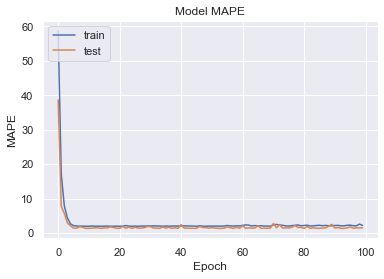

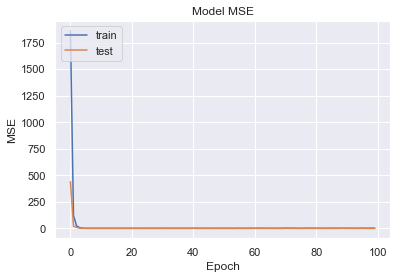

In [3]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model MAPE')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


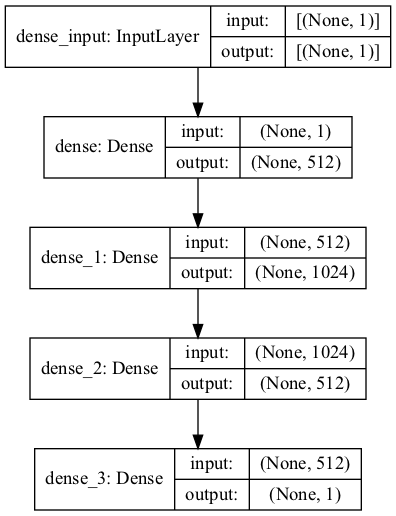

In [4]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Test Set Prediction Plot

In [46]:
df.iloc[1469:, 0].shape

(630,)

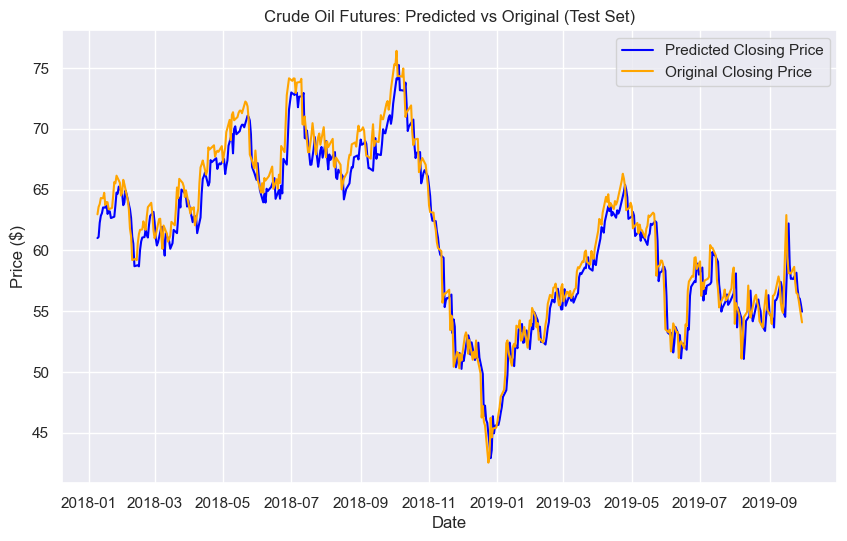

In [48]:
# Create the line plot
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

plt.subplots(figsize=(10, 6), dpi=100)

sns.lineplot(data=df.iloc[1469:, :], x=df.iloc[1469:, 0], y=x_test['prediction'].reshape((630, )), color='blue', label='Predicted Closing Price')
sns.lineplot(data=df.iloc[1469:, :], x=df.iloc[1469:, 0], y=df.iloc[1469:, 1], color='orange', label='Original Closing Price')

# Set the title and axis labels
plt.title('Crude Oil Futures: Predicted vs Original (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

# plotly_fig = go.Figure()
# plotly_fig.add_trace(go.Scatter(x=df.iloc[1469:, 0], y=x_test['prediction'],
# mode='lines', name='Predicted Closing Price',
# line=dict(color='blue')))
# plotly_fig.add_trace(go.Scatter(x=df.iloc[1469:, 0], y=df.iloc[1469:, 1],
# mode='lines', name='Original Closing Price',
# line=dict(color='orange')))
# plotly_fig.update_layout(title='Crude Oil Futures: Predicted vs Original (Test Set)',
# xaxis=dict(title='Date'),
# yaxis=dict(title='Price ($)'))

# plotly_fig.show()


## Train Set Prediction Plot

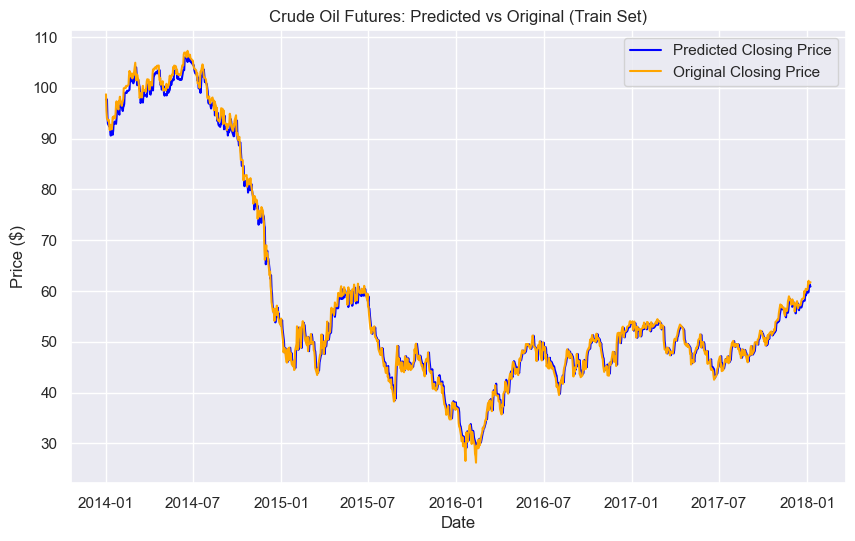

In [55]:
# plotly_fig = go.Figure()
# plotly_fig.add_trace(go.Scatter(x=df.iloc[0:1469, 0], y=x_train['prediction'],
# mode='lines', name='Predicted Closing Price',
# line=dict(color='blue')))
# plotly_fig.add_trace(go.Scatter(x=df.iloc[0:1469, 0], y=df.iloc[0:1469, 1],
# mode='lines', name='Original Closing Price',
# line=dict(color='orange')))
# plotly_fig.update_layout(title='Crude Oil Futures: Predicted vs Original (Train Set)',
# xaxis=dict(title='Date'),
# yaxis=dict(title='Price ($)'))

# plotly_fig.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figsize
plt.subplots(figsize=(10, 6), dpi=100)

# Create the line plot
sns.lineplot(data=df.iloc[0:1469, :], x=df.iloc[0:1469, 0], y=x_train['prediction'].reshape((1469, )), color='blue', label='Predicted Closing Price')
sns.lineplot(data=df.iloc[0:1469, :], x=df.iloc[0:1469, 0], y=df.iloc[0:1469, 1], color='orange', label='Original Closing Price')

# Set the title and axis labels
plt.title('Crude Oil Futures: Predicted vs Original (Train Set)')
plt.xlabel('Date')
plt.ylabel('Price ($)')

# Show the plot
plt.show()


## Full Dataset Prediction Plot

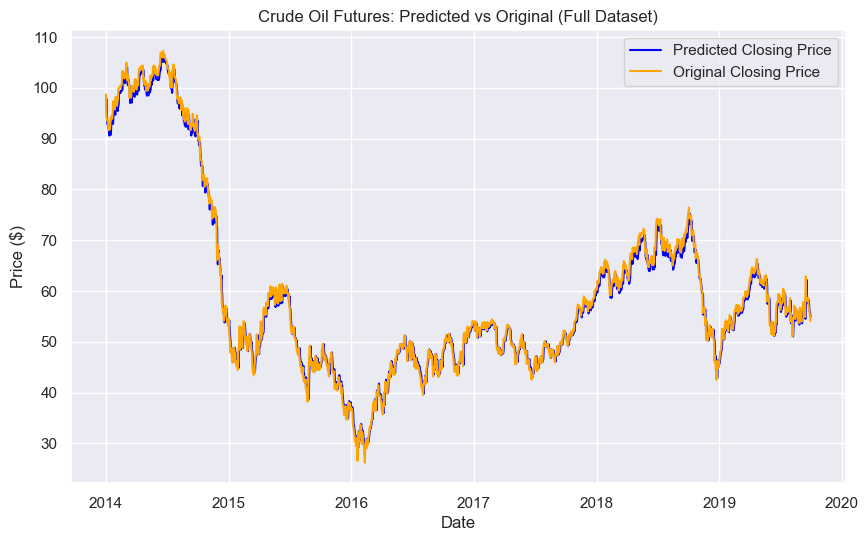

In [53]:
all_preds = np.concatenate([x_train['prediction'], x_test['prediction']], axis=0).reshape((2099, ))

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figsize
plt.subplots(figsize=(10, 6), dpi=100)

# Create the line plot
sns.lineplot(data=df, x=df.iloc[:, 0], y=all_preds, color='blue', label='Predicted Closing Price')
sns.lineplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 1], color='orange', label='Original Closing Price')

# Set the title and axis labels
plt.title('Crude Oil Futures: Predicted vs Original (Full Dataset)')
plt.xlabel('Date')
plt.ylabel('Price ($)')

# Show the plot
plt.show()


# plotly_fig = go.Figure()
# plotly_fig.add_trace(go.Scatter(x=df.iloc[:,0], y=all_preds,
# mode='lines', name='Predicted Closing Price',
# line=dict(color='blue')))
# plotly_fig.add_trace(go.Scatter(x=df.iloc[:,0], y=df.iloc[:,1],
# mode='lines', name='Original Closing Price',
# line=dict(color='orange')))
# plotly_fig.update_layout(title='Crude Oil Futures: Predicted vs Original (Full Dataset)',
# xaxis=dict(title='Date'),
# yaxis=dict(title='Price ($)'))

# plotly_fig.show()